In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicthermalPropsiso (generic function with 1 method)

In [2]:
Eoff=2.0
Ts=collect(300.0:10.0:800.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.15e20,-1.42e20,-1.52e20,-1.75e20]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.635]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

bandX3=parBandTx(effMassX3(var0),0.0,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),0.0,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#

NII=1e12*1e6
vartau0=[bandX3.effMass,Ts[1],1.0,xs[1],1.5,bandX3,NII,bndstTx]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])

tauTOTTx=tau_electron_B([tauAC,tauII2,tauPOP2],vartau0)#
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))

numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))
#@time (sigmas,seebecks)=sigmaArray(bndstTx,Ts,xs,numofn,tauTOTTx,xmax)

51×4 Array{Float64,2}:
 6.928e-310    6.928e-310    6.928e-310    6.92801e-310
 6.928e-310    6.92801e-310  6.92801e-310  6.928e-310  
 6.928e-310    6.928e-310    6.928e-310    6.92801e-310
 6.928e-310    6.92801e-310  6.92801e-310  6.928e-310  
 6.928e-310    6.928e-310    6.928e-310    6.92801e-310
 6.928e-310    6.92801e-310  6.92801e-310  6.928e-310  
 6.928e-310    6.928e-310    6.928e-310    6.928e-310  
 6.928e-310    6.92801e-310  6.92801e-310  6.928e-310  
 6.928e-310    6.928e-310    6.928e-310    6.928e-310  
 6.928e-310    6.92801e-310  6.928e-310    6.92801e-310
 6.928e-310    6.928e-310    6.928e-310    6.928e-310  
 6.928e-310    6.92801e-310  6.92801e-310  6.92801e-310
 6.928e-310    6.928e-310    6.928e-310    6.928e-310  
 ⋮                                                     
 6.92801e-310  6.928e-310    6.928e-310    6.92801e-310
 6.928e-310    6.92801e-310  6.92801e-310  6.928e-310  
 6.928e-310    6.928e-310    6.928e-310    6.92801e-310
 6.92801e-310  6.92801e-3

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)

174.937257 seconds (1.10 G allocations: 293.674 GB, 19.08% gc time)


(
[2.06713 2.07774 2.08137 2.08923; 2.06613 2.07684 2.08049 2.08841; … ; 1.99105 2.00673 2.01202 2.02332; 1.98951 2.00513 2.01042 2.02172],

[1.54744e5 1.84762e5 1.95592e5 2.19548e5; 1.50358e5 1.79304e5 1.90031e5 2.13528e5; … ; 53829.6 64087.3 67844.8 76431.1; 53396.5 63420.8 67068.1 75289.7],

[-0.000139222 -0.000127026 -0.00012319 -0.000115497; -0.000142574 -0.000130256 -0.000126303 -0.000118437; … ; -0.000244176 -0.000230949 -0.000226526 -0.000217177; -0.000244406 -0.000231555 -0.000227259 -0.000218282],

[0.976805 1.17299 1.24441 1.40395; 0.974498 1.16913 1.2417 1.4024; … ; 0.914655 1.02738 1.07202 1.17816; 0.93628 1.04361 1.08645 1.18677],

[0.976805 1.17299 1.24441 1.40395; 0.974498 1.16913 1.2417 1.4024; … ; 0.735952 0.884444 0.939145 1.06483; 0.73717 0.883975 0.93768 1.0595],

[-1.42083e-8 -9.51923e-9 -8.28389e-9 -6.23813e-9; -3.05679e-8 -2.07285e-8 -1.8117e-8 -1.37238e-8; … ; -0.0224181 -0.0192135 -0.018312 -0.0163728; -0.0245052 -0.0210221 -0.0201255 -0.0180574],

[7.96268e-8

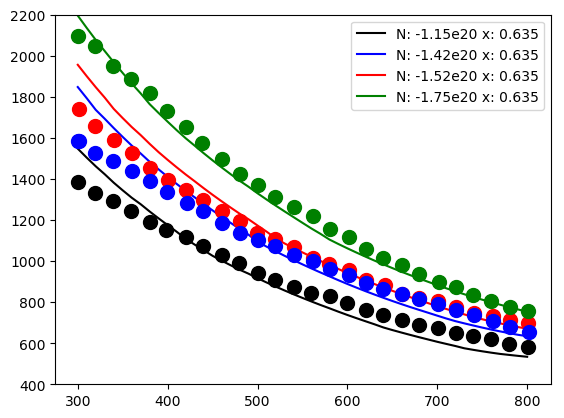

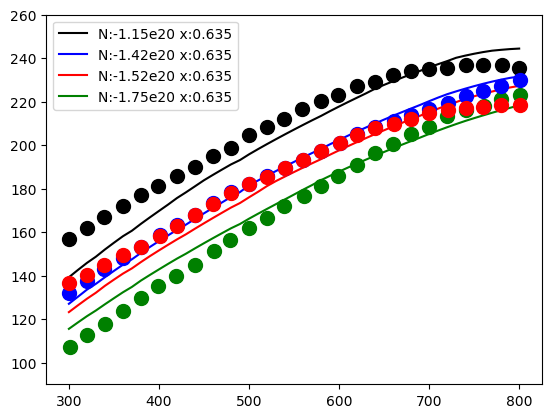

PyObject <matplotlib.legend.Legend object at 0x7f8856c7c6d8>

In [4]:
colors=["k","b","r","g","m","y","c"]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        k+=1
        #push!(plots,p)       
    end
end
plot(LMg2SiSn04TE,LMg2SiSn04E, linestyle="None",marker=".",markersize=20,color="k")
plot(LMg2SiSn07TE,LMg2SiSn07E, linestyle="None",marker=".",markersize=20,color="r")
plot(LMg2SiSn06TE,LMg2SiSn06E, linestyle="None",marker=".",markersize=20,color="b")
plot(LMg2SiSn08TE,LMg2SiSn08E, linestyle="None",marker=".",markersize=20,color="g")
ylim(400,2200)
legend()
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)
        plot(Ts,-1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    end
end
plot(LMg2SiSn04TS,LMg2SiSn04S, linestyle="None",marker=".",markersize=20,color="g")
plot(LMg2SiSn07TS,LMg2SiSn07S, linestyle="None",marker=".",markersize=20,color="k")
plot(LMg2SiSn06TS,LMg2SiSn06S, linestyle="None",marker=".",markersize=20,color="b")
plot(LMg2SiSn08TS,LMg2SiSn08S, linestyle="None",marker=".",markersize=20,color="r")
ylim(90,260)
legend(loc="upper left")